In [73]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random as rand


In [74]:


def detect_lines(img, threshold1=50, threshold2=135, apertureSize=3, minLineLength=10, maxLineGap=300):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
    edges = cv2.Canny(gray, threshold1, threshold2, apertureSize) # detect edges
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 40, minLineLength, maxLineGap) # detect lines
    if lines is None:
        pass
    else:
        return lines



In [75]:
def draw_lines(img, lines, color = (0, 255, 0)):
    if lines is None:
        pass
    else:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            if x1 == x2:
                x1 += 0.0000000001
            slope = (y1-y2) / (x1 - x2)
            cv2.line(img, (x1, y1), (x2, y2), color, 2)
    return img

In [76]:
def get_slopes_intercepts(lines):
    slopes = []
    intercepts = []
    if lines is None:
        pass
    else:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            slope = (y1-y2) / (x1 - x2)
            xIntercept = -y1/slope + x1
            slopes.append(slope)
            intercepts.append(xIntercept)
    return slopes, intercepts

In [77]:
def detect_lanes(lines):
    lanes = []

    if lines is None:
        pass
    else:
        slopes, intercepts = get_slopes_intercepts(lines)
        for i in range(len(lines)):
            for j in range(i+1, len(lines)):
                if np.abs(slopes[i] - slopes[j]) < 0.25:
                    lanes.append([lines[i], lines[j]])
                    i += 1 #to make sure single line isn't paired with more than one other line

    return lanes 

In [78]:
##Rome wrote this + AJ
def get_color():
    #gets integer from 0 to 255, inclusive or not isn't really important
    a=rand.randint(0,255)
    #returns tuple you can use that 
    return (0, a, 0)

In [79]:

def draw_lanes(img, lanes):
    for lane in lanes:
        draw_lines(img, lane, get_color())
    return img

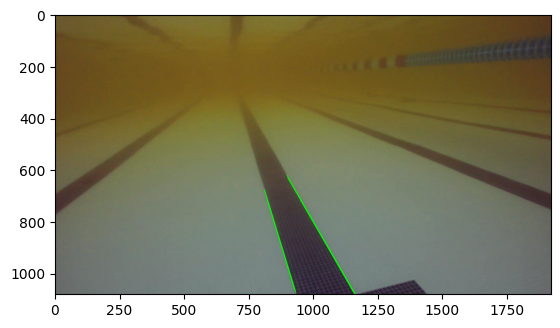

In [94]:
pool = cv2.imread('pool.jpg')
graypool = cv2.cvtColor(pool, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(graypool, 50, 135, apertureSize=3)
lines = cv2.HoughLinesP(
    edges,
    1,
    np.pi/180,
    40,
    minLineLength=10,
    maxLineGap=300,
)

for line in lines:
    x1, y1, x2, y2 = line[0]
    slope = (y1-y2) / (x1 - x2)
    if np.abs(slope) > 1.2:
        cv2.line(pool, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(pool)

In [96]:
print(draw_lines(pool, detect_lines(pool, minLineLength = 10)))

[[[100  90  43]
  [100  90  43]
  [102  89  43]
  ...
  [ 86  55  34]
  [ 86  55  34]
  [ 86  55  34]]

 [[100  89  45]
  [100  89  45]
  [102  89  45]
  ...
  [ 86  55  34]
  [ 86  55  34]
  [ 86  55  34]]

 [[102  88  46]
  [102  88  46]
  [102  88  46]
  ...
  [ 86  55  32]
  [ 86  55  34]
  [ 86  55  34]]

 ...

 [[101 107 106]
  [100 106 105]
  [ 99 105 104]
  ...
  [105 104 106]
  [105 104 106]
  [105 104 106]]

 [[ 99 104 103]
  [100 105 104]
  [102 107 106]
  ...
  [105 104 106]
  [105 104 106]
  [105 104 106]]

 [[ 98 103 102]
  [100 105 104]
  [103 108 107]
  ...
  [105 104 106]
  [105 104 106]
  [105 104 106]]]


In [99]:

##AJ Wrote this
def get_lane_center(lanes):
    ##get_slopes_intercepts returns the slope and intercept in a tuple, lanes[0][0] gets the first line in the first lane
    
    if lanes is None:
        pass
    else:
        center = (get_slopes_intercepts(lanes[0][0])[1] + get_slopes_intercepts(lanes[0][1])[1]) / 2
        for i in range(1, len(lanes)):
            lane_center = (get_slopes_intercepts(lanes[i][0])[1] + get_slopes_intercepts(lanes[i][1])[1]) / 2
            # we get intercepts for line 1 and line 2 for each lane and get the average
            if np.abs(lane_center - 960) < np.abs(center - 960):
                center = lane_center
                slope = (get_slopes_intercepts(lanes[i][0])[0] + get_slopes_intercepts(lanes[i][1])[0]) / 2

        return center, slope


    

    

#if the slopes are equal or if their x1 coordinates are equally distant from the midpoint of their x2 coordinates





In [97]:
##Rome wrote this
def recommend_direction(center, slope):
    #Gets if center is within 10 pixels of 960, it returns forward, otherwise gets back to center

    if center < 970 and center > 950:
        return("forward")
    if center <= 950:
        return("left")
    else:
        return("right")

In [101]:
print(recommend_direction(*get_lane_center(detect_lines(pool, minLineLength = 10))))

TypeError: __main__.recommend_direction() argument after * must be an iterable, not NoneType